##Learning Objectives:

_____________
By the end of the lesson, all learners are expected to achieve the following objectives:
- Describe the original transformer architecture and its two main components - the encoder and the decoder.
- Explain the sub-layers of the encoder and decoder, including multi-head self-attention, feed-forward neural network, and residual connection, and layer normalization.
- Understand the working of self-attention, including contextualized embeddings, attention weights, and the concept of scaled dot-product attention.
- Explain how positional enables the model to capture the notion of order and structure of the input sequence.

##Prerequisites:
_____

- Knowledge of recurrent neural networks (RNNs) and their their limitations.
- Familiarity with natural language processing (NLP) concepts such as tokenization, word embeddings, and language models.
- Understanding of attention mechanisms in neural networks, such as the Bahdanau and Luong attention models.
- Familiarity with transfer learning and its applications in NLP.
- Knowledge of Python programming and popular deep learning frameworks such as TensorFlow or PyTorch.

# 2. Original Transformer Architecture
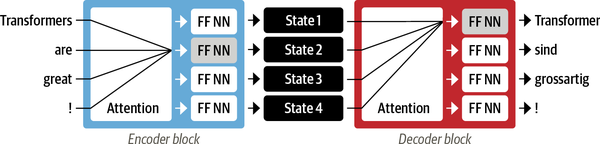

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

The transformer introduced a new approach to modeling by eliminating the need for recurrence and solely relying on **self-attention**, which is a unique form of attention.

**Self Attention:** The concept behind self-attention is to enable attention to work on all the states within a single layer of the neural network. In the provided diagram, the encoder and decoder each have their own self-attention mechanisms, which then feed their outputs to feed-forward neural networks (FF NN). This architecture allows for faster training compared to recurrent models and has been instrumental in many recent advancements in NLP.

In the next section, we will examine the encoder and decoder's internal operations and will be looking into Self Attention in detail.


**The original Transformer architecture:**
transformers.svg

**Figure:** [Attention is all you need Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

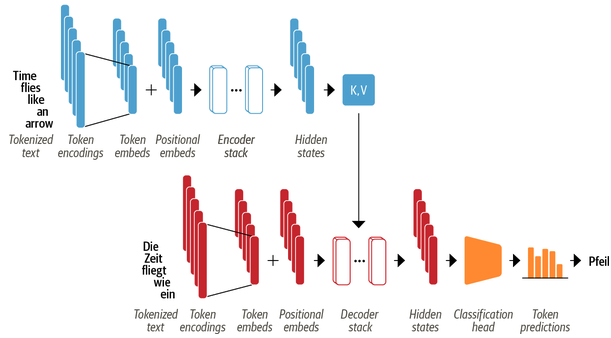

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)


The transformer architecture consists of two main parts:

## **2.1 The Encoder (Left):**

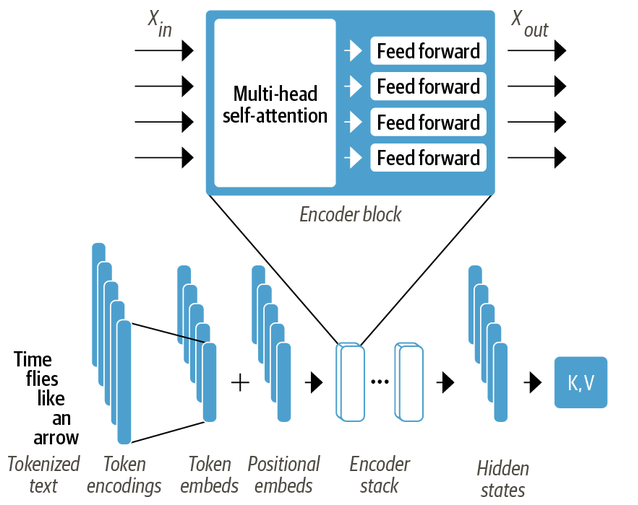

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

It takes in the input and creates a representation of its features, allowing the model to gain an understanding of the input. It Converts an input sequence of tokens into a sequence of
embedding vectors, often called the hidden state or context.

> The Encoder consists of two sub-layers: a multi-head self-attention mechanism, and the second is a simple, position-wise fully connected feed-forward network. There is a residual connection attached to each of the sub-layers followed by Layer Normalization. The residual connection helps data to reach latter parts of the neural network by skipping some layers whereas Layer Normalization is the normalization that is done along the length of the d-dimensional vector (input size) and not across the batch of size B.


## **2.2 The Decoder (Right):**
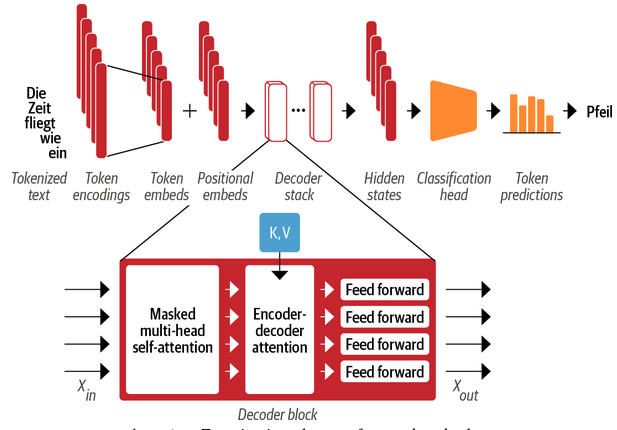

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

The decoder uses the encoder's representation along with additional inputs to produce a target sequence, enabling the model to generate outputs.

> In addition to the two sub-layers in encoder, it has an additional sub-layer, which performs multi-head attention over the output of the encoder stack. Similar residual connection followed by layer normalization is also added to the decoder. The third sub-layer is modified in a way that the predictions for position i can depend only on the known outputs at positions less than i (i.e. sequences before the position i).

> The output of this step is then fed back into the decoder to generate the next token, and so on until a special  nd-of-sequence (EOS) token is reached.

## **2.3 Self Attention:**
Attention in general refers to focus on some specific section of words while ignoring others. Attention is used to understand the context of a word in a sequence.

The concept of self-attention is to utilize the entire sequence to compute a weighted average of each token's embedding instead of relying on a fixed embedding for each token like word2vec. Embeddings that are generated this way are called contextualized embeddings. This can be restated as self-attention generating a new sequence of embeddings $x_1', \ldots, x_n'$ when given a sequence of token embeddings $x_1, \ldots, x_n$, where each new embedding $x_i'$ is a linear combination of all the $x_j$ in the sequence.

$x_i' = \sum_{j=1}^{n} w_{ji} x_j$

The coefficients $w_{ji}$ are called attention weights and are normalized so that:

$\sum_{j=1}^{n} w_{ji} = 1$


For example, let’s consider these two sentences.

    I love cool, crisp fall weather.
    Don’t fall on your way to the gym.

  The word fall in the first sentence denotes weather by looking at words like cool and crips whereas fall in the second sentence denotes actually falling by looking at words like way and gym.


  Let's look at another example with attention in action:

  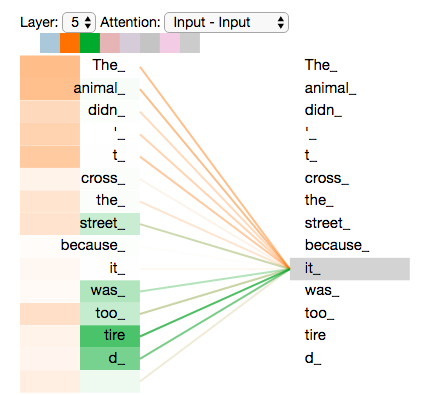

  In this example, the model's representation of the word "it" bakes in some of the representation of both "animal" and "tired".

The word “apple” will be updated to be more “company-like” and less
“fruit-like” if the words “keynote” or “phone” are close to it.


**Transformer Architecture and Attention**
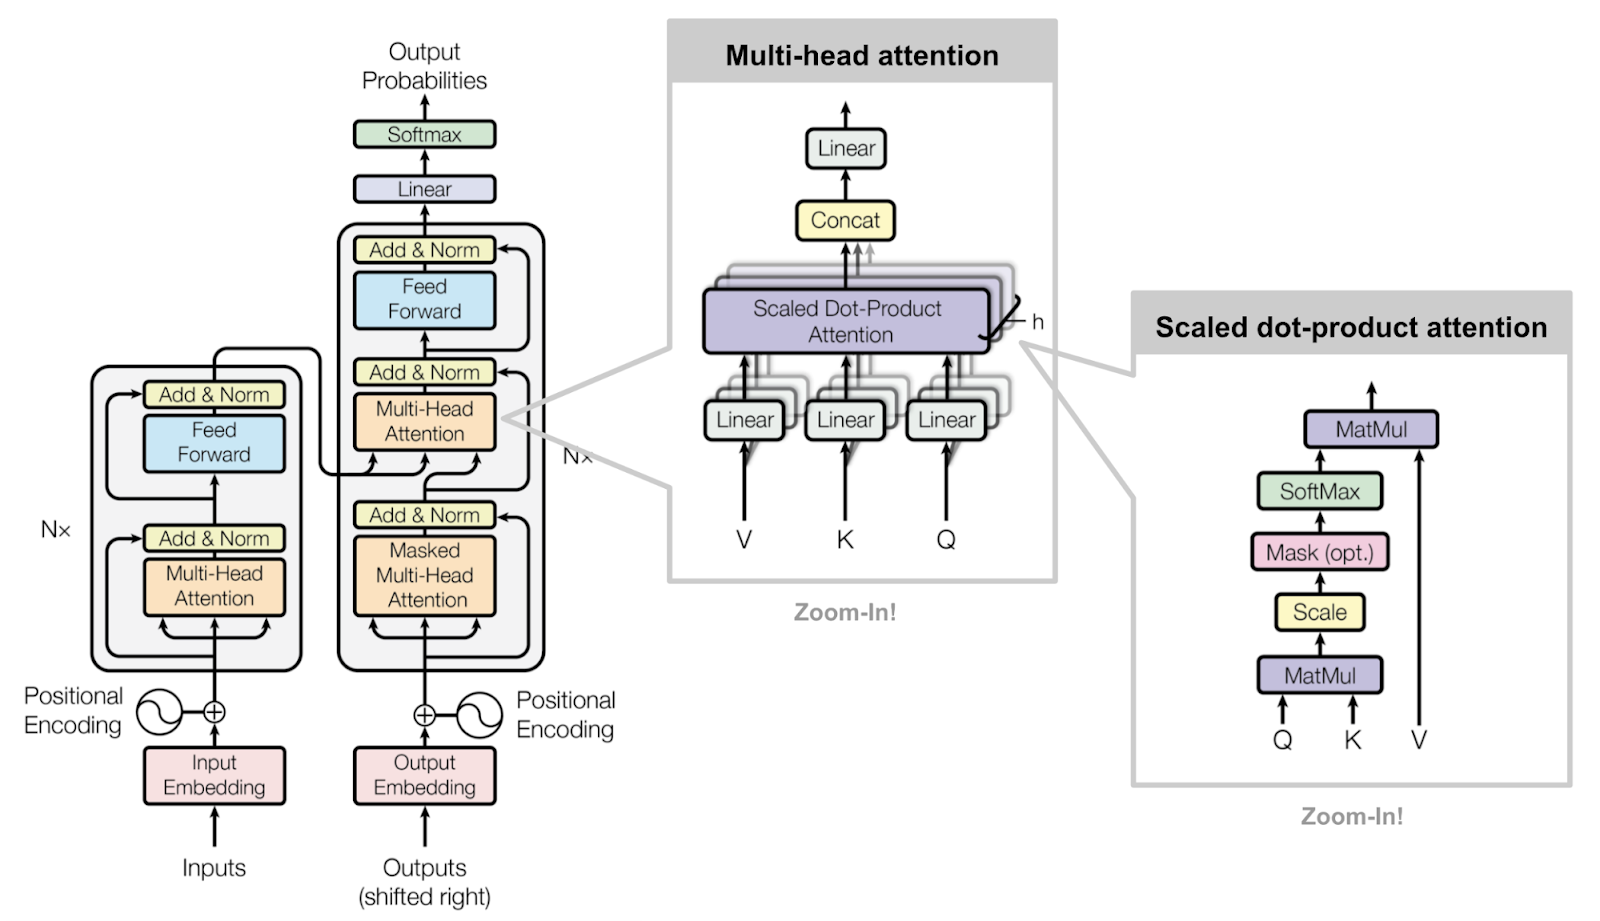

**Figure:** [Components of Transformers Architecture](https://lih-verma.medium.com/components-of-transformer-architecture-748f74a1a40d)

###2.3.1 Scaled Dot-Product Attention

Scaled Dot-Product Attention is used to calculate the attention weights.

The first step in calculating self-attention is to project three vectors from each of the encoder’s input vectors (in this case, token embeddings). So for each word, we project three matrices, $Q,K,V$ and which are called Query vector, a Key vector, and a Value vector and each has a dimension of ${d_{k}}$. (where ${d_{k}}$ is the dimension of the key vectors), and it's common to scale the dot product. The scaling factor is introduced for numerical stability reasons. These vectors are created by multiplying the embedding by three matrices that we trained during the training process.

The dot product acts as a similarity function which determines how much the query and key vectors relate to each other. If queries and keys are similar, they will result in a significant dot product.

The output is calculated as a weighted sum of the values, with each value's weight determined by the query's compatibility function with its corresponding key.

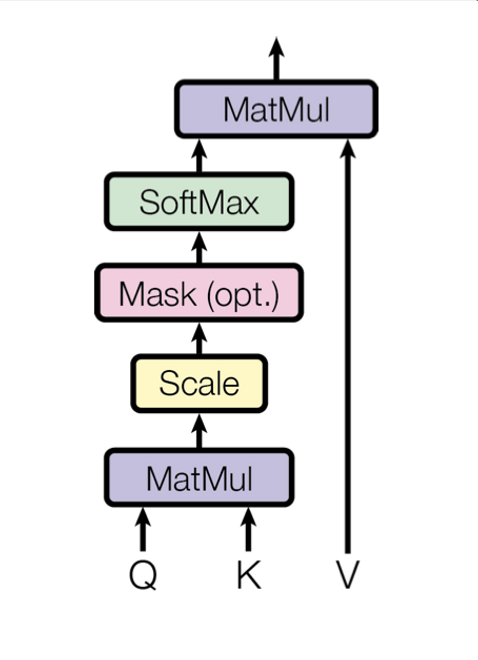

**Figure:** [Attention is all you need Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

To obtain the final weights on the values, first, the dot product of the query with all keys is computed and then normalized by $\sqrt{d_{k}}$. Then a softmax function is applied. Finally, $V$ is multiplied with the previous output.

The final output is:

$Attention(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$

The intuition is that the softmax reweights between 0 and 1 (kind of like probability for each word), which sums upto 1 for all the words. So, multiplying this probability with $V$ determines the contribution of each word against each other.  

#### **Implementation of Single Headed Attention in Pytorch:**

In [ ]:
import torch.nn as nn
import torch
import math

class SimpleSingleHeadedAttention(nn.Module):
    """
    Simple Single Headed Attention
    """
    def __init__(self, input_dim: int, bias: bool = True):
        """
        Initializes the SimpleSingleHeadedAttention module.

        Args:
        - input_dim: int, input dimension size.
        - bias: bool, whether to include bias or not in linear layers.
        """
        super().__init__()
        self.qkv = nn.Linear(input_dim, input_dim*3, bias=bias)
        self.proj = nn.Linear(input_dim, input_dim, bias=bias)

    def forward(self, x: torch.Tensor):
        """
        Forward pass of the SimpleSingleHeadedAttention module.

        Args:
        - x: torch.Tensor, input tensor of shape (batch size, sequence length, input dimension).

        Returns:
        - x: torch.Tensor, output tensor of shape (batch size, sequence length, input dimension).
        """
        B, S, C = x.shape # batch size, sequence length, input dimension
        # split into queries, keys, & values of shape (batch size, sequence length, input dimension)
        qkv = self.qkv(x).reshape(B, S, 3, C).permute(2, 0, 1, 3)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = q @ k.transpose(-2, -1) # calculate dot product attention
        attn = attn / math.sqrt(k.size(-1)) # scale by square root of output dimension

        attn = attn.softmax(dim=-1) # apply softmax. reweights between 0 and 1, summing to 1
        x = (attn @ v).transpose(1, 2).reshape(B, S, C)
        return self.proj(x)

### 2.3.2 Multi-Head Attention

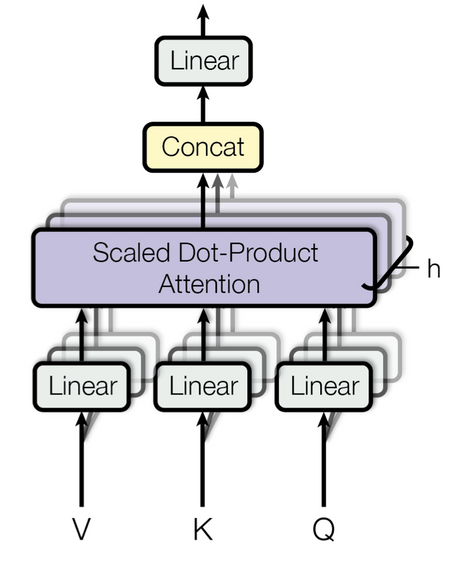

**Figure:** [Attention is all you need Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

Multi-Head attention is used to find relationship between the inputs and create specific contextualized embeddings. Why do we require several attention heads? The explanation is that one head's softmax has a tendency to concentrate mostly on one similarity. The model's multiple heads enable it to concentrate on multiple factors at once. For instance, one head might concentrate on the subject-verb relationship while the other looks for surrounding adjectives.

 Instead of performing single attention function on $Q,K,V$. We linearly project the queries, keys and values h times with different, learned linear projections to $d_{k}, d_{k}$ and $d_{v}$dimensions. Then we perform attention function in parallel using those linearly projected values. These embeddings can then be concatenated and put through an ordinary linear neural network layer, together making the final output of the Multi-Headed Attention.

#### Implementation of Multi Headed Attention in Pytorch:

In [ ]:
import torch.nn as nn
import torch
import math

class MultiHeadedAttention(nn.Module):
    """
    Multi-Head Attention with Dropout
    """
    def __init__(self, input_dim: int, num_heads: int, bias: bool = True, attn_drop: float = 0.1, proj_drop: float = 0.1):
        """
        Initializes the MultiHeadedAttention module.

        Args:
        - input_dim: int, input dimension size.
        - num_heads: int, number of attention heads.
        - bias: bool, whether to include bias or not in linear layers.
        - attn_drop: float, dropout probability for attention weights.
        - proj_drop: float, dropout probability for final output.
        """
        super().__init__()
        assert input_dim % num_heads == 0 # input dimension must be divisible by num heads
        self.nh = num_heads # number of attention heads
        self.qkv = nn.Linear(input_dim, input_dim*3, bias=bias) # linear layer to project queries, keys, values
        self.proj = nn.Linear(input_dim, input_dim, bias=bias) # linear layer to project final output
        self.attn_drop = nn.Dropout(attn_drop) # attention dropout layer to prevent overfitting
        self.proj_drop = nn.Dropout(proj_drop) # final output dropout layer to prevent overfitting

    def forward(self, x: torch.Tensor):
        """
        Forward pass of the MultiHeadedAttention module.

        Args:
        - x: torch.Tensor, input tensor of shape (batch size, sequence length, input dimension).

        Returns:
        - x: torch.Tensor, output tensor of shape (batch size, sequence length, input dimension).
        """
        B, S, C = x.shape # batch size, sequence length, input dimension
        # split into queries, keys, & values of shape (batch size, num heads, sequence length, head size)
        qkv = self.qkv(x).reshape(B, S, 3, self.nh, C // self.nh).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = q @ k.transpose(-2, -1) # calculate dot product attention for each head
        attn = attn / math.sqrt(k.size(-1)) # scale by square root of output dimension

        attn = attn.softmax(dim=-1) # apply softmax to get attention weights
        attn = self.attn_drop(attn) # apply dropout to attention weights

        x = (attn @ v).transpose(1, 2).reshape(B, S, C) # apply attention weights to values and reshape back to (B, S, C)
        return self.proj_drop(self.proj(x)) # linear projection to get final output and apply dropout to final output


## 2.4 The Feed-Forward Layer (FF NN)

The feed-forward sublayer found in the encoder and decoder is a basic neural network consisting of two fully connected layers.

However, rather than treating the sequence of embeddings as a single vector, it handles each embedding independently.
This is why it is commonly called the position-wise feed-forward layer.

This can also be thought of as a one-dimensional convolution with a kernel size of one.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_1 = nn.Linear(config.hidden_size, config.intermediate_size)
        self.linear_2 = nn.Linear(config.intermediate_size, config.hidden_size)
        self.gelu = nn.GELU()
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.gelu(x)
        x = self.linear_2(x)
        x = self.dropout(x)
        return x

## 2.5 Layer Normalization

The layer normalization technique is used in the Transformer architecture along with skip connections. It normalizes each input in the batch to have zero mean and unity variance, while the skip connections pass a tensor to the next layer of the model without processing and add it to the processed tensor.

### 2.5.1 Pre Layer Normalization

Pre layer normalization is the most common arrangement found in the literature, which places layer normalization within the span of the skip connections. This arrangement tends to be much more stable during training and does not usually require any learning rate warm-up.

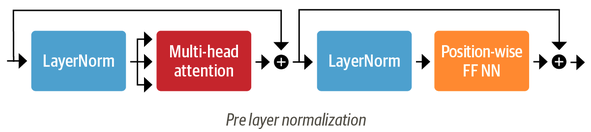

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

### 2.5.2 Post Layer Normalization

The Transformer paper uses post layer normalization, which places layer normalization in between the skip connections. This arrangement can be challenging to train from scratch as the gradients can diverge. Hence, a concept known as learning rate warm-up is often employed, where the learning rate is gradually increased from a small value to some maximum value during training.

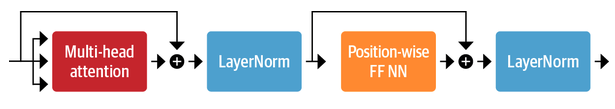

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)


## 2.6 Positional Encoding

Since transformers do not have any notion of sequence order or position, positional encoding allows the transformer to better understand the order of the input sequence.

Positional encoding takes place in the input embedding layer of the Transformer model. It is added to the input embeddings of each token in a sequence to inject information about their relative positions.

This is done by adding a fixed-length vector to each position in the sequence, where the vector is determined by the position in the sequence and a set of learned parameters.

**Positional Vector Example(One hot representation):**
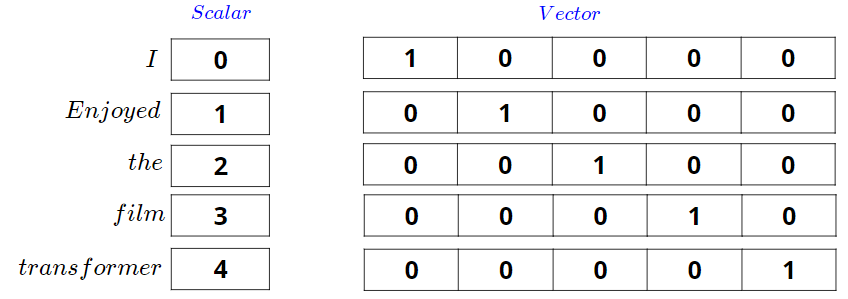

**Positional Vector Example( Broadcasting)**
![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*t9_Ei1-bd-ZiPnKRONbuVg.png)

**Figure**: [Making Sense of Positional Encoding in Transformer Architectures with Illustrations](https://medium.com/@a.arun283/a-deeper-look-into-the-positional-encoding-method-in-transformer-architectures-7e98f32a925f)


Both the encoding method used above have their own caveats:

1. **One hot representation:** lacks the notion of distance
2. **Broadcasting:** lacks the notion of orthogonality

But positional encoding must consider both the factors such as: notion of distance as well as the orthogonality. This is where sinusoids functions come into play.
![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*11ttP0io0io_e-DylyfhqA.png)

- The image above shows the sine wave function which gives the notion of distance between any two words by their wavelength. For example: The wave of 3*pi wavelength is close to 4*pi than to 5*pi.

- The next important requirement is orthogonality.Sine and cosine have an angle difference of 90. so we can see that they are orthogonal. What about the orthogonality for two sine waves with various frequencies (or wavelengths), though? In the infinite-dimensional real vector space, they are orthogonal.


Here is the formula that makes use of the sinusoidal functions as shown below,

![](https://miro.medium.com/v2/resize:fit:1130/format:webp/1*owlf_Tv44r6J6f1aOUmm7w.png)

Well, what is the significance of the cosine part?We may wind up with rows full of zeros because we are utilizing sine waves that frequently cross zero. We must interleave (or concatenate) the cosine waves in order to prevent this. Therefore the amplitude cosine becomes +1 or -1 whenever the amplitude of sine becomes zero.

**Positional Embeddings Concatenation:**
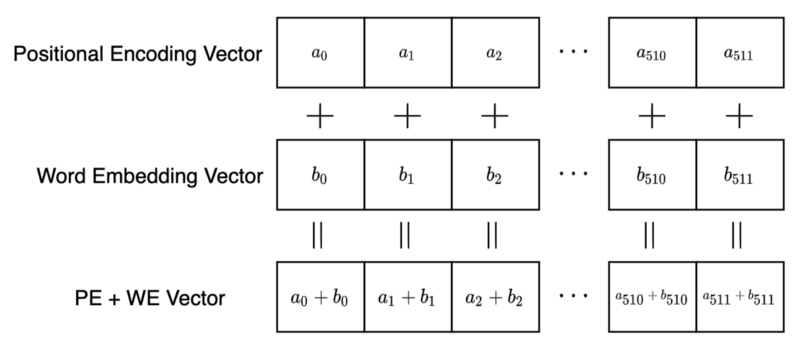

**Figures and Suggested Reading:** [ Making Sense of Positional Encoding in Transformer Architectures with Illustrations](https://medium.com/@a.arun283/a-deeper-look-into-the-positional-encoding-method-in-transformer-architectures-7e98f32a925f)


#### 2.6.1 Types of Positional Representations:
1. *Absolute Positional Representations:*
  It is based solely on the position of the token in the sequence and are not affected by the content of the sequence. In other words, each token is assigned a unique positional embedding based on its absolute position in the sequence, regardless of the content of the token or other tokens in the sequence. For example: BERT.


2. *Relative Positional Representations:*
  It takes into account the content of the sequence as well as the position of the token. This means that the positional embedding for each token is computed based on its relative position with respect to other tokens in the sequence. For example, the positional embedding for the second token in the sequence would be computed differently depending on whether the first token was "dog" or "cat". Models such as DeBERTa use such representations.

**Suggested Further Study on Transformer Architecture:**

[The Illustrated Transformers](https://jalammar.github.io/illustrated-transformer/)

[Attention is all you need](https://arxiv.org/abs/1706.03762)